In [1]:
from random import gauss, randrange, choice, random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_rewards(k=10):
    rewards = {}
    for i in range(k):
        q = gauss(0, 1)
        rewards[i] = q
        
    return rewards

rewards = create_rewards(20)
print(rewards[12])

-0.30351297278532097


In [3]:
def choose_action(A, eps=0):
    greedy = max(A, key=A.get)
    action = greedy
    if random() < eps:
        while action == greedy:
            action = choice(list(A.keys()))
    return action

A = {
    0: 1,
    1: 2,
    2: 6,
    3: 2,
    4: 1
}

choices = []
for i in range(1000):
    choices.append(choose_action(A, 0.1))
    
chosen = {
    0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 0
}

for choice_ in choices:
    chosen[choice_] += 1
    
print(chosen)

{0: 32, 1: 24, 2: 899, 3: 23, 4: 22}


In [4]:
def collect_reward(a, rewards, sig=1):
    q = rewards[a]
    reward = gauss(0, sig) + q
    
    return reward

total = 0
rewards = create_rewards(20)
for i in range(100000):
    total += collect_reward(12, rewards)

print(total / 100000)

-0.9316207681812391


In [5]:
def evaluate_action_value(a, history):
    times_taken = 0
    total_reward = 0
    for time_step in history:
        if a == time_step['a']:
            times_taken += 1
            total_reward += time_step['r']
            
    if times_taken == 0:
        return 0
    
    return total_reward / times_taken

In [6]:
def learn(k=10, eps=0, steps=1, sig=1):
    rewards = create_rewards(k)
    A = {a: 0 for a in range(k)}
    history = []
    for step in range(steps):
        a = choose_action(A, eps)
        reward = collect_reward(a, rewards, sig)
        history.append({
            'a': a,
            'r': reward
        })
        A[a] = evaluate_action_value(a, history)
        
    rewards = [step['r'] for step in history]
    return rewards

rewards = learn(10, eps=0.1, steps=100)
for reward in rewards[:10]:
    print(reward)

-0.6095060804789797
1.1113636827117903
0.9485985163917465
1.293610422588395
2.2440150575365454
1.6125515553375716
1.263357147465023
1.6075218946797747
1.2694519454496012
1.2604207794444624


In [7]:
def create_histories(k=10, epss=[0, 0.01, 0.1], steps=1000, runs=2000, sig=1):
    histories = {}
    for eps in epss:
        histories[eps] = np.zeros((runs, steps))
        for run in range(runs):
            
            history = learn(k, eps, steps, sig)
            histories[eps][run] = history
        
        histories[eps] = np.average(histories[eps], axis=0)
    
    return histories

In [15]:
k = 10
epss = [0, 0.01, 0.03, 0.1, 0.5]
eps = 0.1
rate = 500
steps = 1000
runs = 2000
sig = 1

In [9]:
histories = create_histories(k, epss, steps, runs, sig)

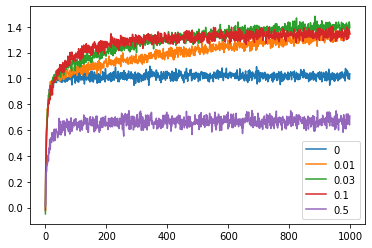

In [10]:
for eps, rewards in histories.items():
    plt.plot(rewards, label=eps)
plt.legend()
plt.show()

In [11]:
def adjust_epsilon(eps, run, rate):
    exponent = (-1 / rate) * run
    adjustment = 10 ** exponent
    eps_adjusted = eps * adjustment
    
    return eps_adjusted

print(adjust_epsilon(0.1, 1000, 2000))

0.0316227766016838


In [12]:
def create_histories_single(k=10, eps=0.1, rate=2000, steps=1000, runs=2000, sig=1):
    history = np.zeros((runs, steps))
    for run in range(runs):
        eps_adjusted = adjust_epsilon(eps, run, rate)
        rewards = learn(k, eps_adjusted, steps, sig)
        history[run,:] = rewards
        
    history = np.average(history, axis=0)
    
    return history

In [ ]:
history = create_histories_single(k=k, eps=eps, rate=rate, steps=steps, runs=runs, sig=sig)

In [ ]:
for eps, rewards in histories.items():
    plt.plot(rewards, label=eps)
plt.plot(history, label="adj")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.legend()
plt.show()